In [1]:
import pandas as pd
import numpy as np



file = "aes_data.xlsx"

data = pd.read_excel(file)




# data = data.drop([0,1,2], axis=0)

df = data.drop([0,1,2], axis=0)
cols_fillna = df.columns.values
for col in cols_fillna[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)


    

# df[cols_fillna[-1]][df[cols_fillna[-1]].isnull()]

# data.head()


In [2]:
# df[cols_fillna[-1]] = df[cols_fillna[-1]].fillna(0)

# df[cols_fillna[-1]][df[cols_fillna[-1]].isnull()]

In [3]:
# df.head()
df.dtypes


Время                  object
10LAB11CP002_XQ01     float64
10LAB12CP002_XQ01     float64
10LAB13CP002_XQ01     float64
10LAB14CP002_XQ01     float64
10LAB15CP002_XQ01     float64
10LAB11CP003_XQ01     float64
10LAB12CP003_XQ01     float64
10LAB13CP003_XQ01     float64
10LAB14CP003_XQ01     float64
10LAB15CP003_XQ01     float64
10LAB11CF001_XQ01     float64
10LAB12CF001_XQ01     float64
10LAB13CF001_XQ01     float64
10LAB14CF001_XQ01     float64
10LAB15CF001_XQ01     float64
10LAB00FT902_XQ01     float64
10LAC11CE021_XQ01     float64
10LAC12CE021_XQ01     float64
10LAC13CE021_XQ01     float64
10LAC14CE021_XQ01     float64
10LAC15CE021_XQ01     float64
10LAC11CS001A_XQ01    float64
10LAC12CS001A_XQ01    float64
10LAC13CS001A_XQ01    float64
10LAC14CS001A_XQ01    float64
10LAC15CS001A_XQ01    float64
10BBA00CE010_XQ01     float64
10BBB00CE010_XQ01     float64
10BBC00CE010_XQ01     float64
10BBD00CE010_XQ01     float64
10MKA10CE912_XQ01     float64
10JKS00FU901_XQ01     float64
dtype: obj

In [4]:
print(df.isnull().values.any())
df.fillna(0)
print(df.isnull().values.any())


False
False


In [5]:
df[df.isnull()]
# df


,Время,10LAB11CP002_XQ01,10LAB12CP002_XQ01,10LAB13CP002_XQ01,10LAB14CP002_XQ01,10LAB15CP002_XQ01,10LAB11CP003_XQ01,10LAB12CP003_XQ01,10LAB13CP003_XQ01,10LAB14CP003_XQ01,...,10LAC12CS001A_XQ01,10LAC13CS001A_XQ01,10LAC14CS001A_XQ01,10LAC15CS001A_XQ01,10BBA00CE010_XQ01,10BBB00CE010_XQ01,10BBC00CE010_XQ01,10BBD00CE010_XQ01,10MKA10CE912_XQ01,10JKS00FU901_XQ01
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8760,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
import matplotlib.pyplot as plt
import pandas as pd



# a scatter plot comparing num_children and num_pets
# data.iloc[:5,:].reset_index().plot(kind='line',x='index',y='10LAB11CP002_XQ01',color='red', ax=ax)


x, y = df['10LAB11CP002_XQ01'].min(), df['10LAB11CP002_XQ01'].max()
# df['SIZE'] = (df.TOTAL - x) / (y - x) * (b - a) + a


plot_df = pd.to_numeric(df['10LAB11CP002_XQ01'], errors='coerce')

df1 = (plot_df - plot_df.mean())/plot_df.std()

df1.head()




3   -0.032401
4   -0.032401
5   -0.032401
6   -0.032401
7   -0.032401
Name: 10LAB11CP002_XQ01, dtype: float64

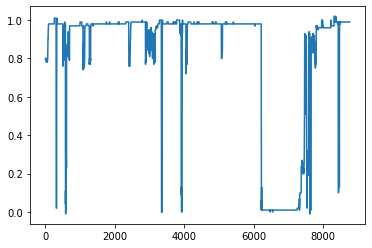

In [7]:
ax = plt.gca()

plt.plot(df.reset_index()['index'], df['10LAB11CP002_XQ01'])


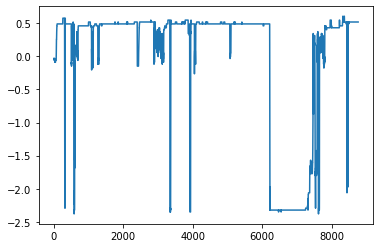

In [8]:
df1.head()

plt.plot(df.reset_index()['index'], df1)


In [9]:
plot_df2 = pd.to_numeric(df['10JKS00FU901_XQ01'], errors='coerce')

df2 = (plot_df2-plot_df2.mean())/plot_df2.std()
df2.head()

3   -0.453021
4   -0.458913
5   -0.469224
6   -0.811712
7   -0.822760
Name: 10JKS00FU901_XQ01, dtype: float64

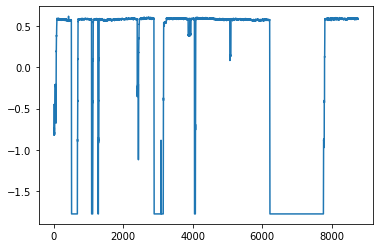

In [10]:
plt.plot(df.reset_index()['index'], df2)

In [11]:
# v1 = pd.to_numeric(df['10JKS00FU901_XQ01'], errors='coerce')[:3000]
# v2 = pd.to_numeric(df['10LAB11CP002_XQ01'], errors='coerce')[:3000]



# np.cov(v1.to_numpy().T,v2.to_numpy().T, rowvar=0)

np.cov(df1.to_numpy()[:].T,df2.to_numpy()[:].T, rowvar=0)




array([[1.        , 0.79351791],
       [0.79351791, 1.        ]])

In [12]:
np.corrcoef(df1.to_numpy()[:], df2.to_numpy()[:])

array([[1.        , 0.79351791],
       [0.79351791, 1.        ]])

In [13]:
np.correlate(df1,df2)

array([6949.62987013])

In [14]:
filtered_df = df1[df1.isnull()]

In [15]:
print(filtered_df)

Series([], Name: 10LAB11CP002_XQ01, dtype: float64)


In [16]:
filtered_df = df2[df2.isnull()]
print(filtered_df)

Series([], Name: 10JKS00FU901_XQ01, dtype: float64)


In [17]:
df2[3060:3100]

3063   -1.780989
3064   -1.780989
3065   -1.780989
3066   -1.780989
3067   -1.780989
3068   -1.780989
3069   -1.780989
3070   -1.780989
3071   -1.780989
3072   -1.780989
3073   -1.780989
3074   -1.780989
3075   -1.780989
3076   -1.780989
3077   -1.780989
3078   -1.780989
3079   -1.780989
3080   -1.780989
3081   -1.780989
3082   -1.780989
3083   -1.780989
3084   -1.780989
3085   -1.780989
3086   -1.614533
3087   -0.900832
3088   -0.903779
3089   -0.886102
3090   -0.895677
3091   -1.079073
3092   -1.780989
3093   -1.780989
3094   -1.780989
3095   -1.780989
3096   -1.780989
3097   -1.780989
3098   -1.780989
3099   -1.780989
3100   -1.780989
3101   -1.780989
3102   -1.780989
Name: 10JKS00FU901_XQ01, dtype: float64

In [18]:
df.isnull().values.any()

False

In [19]:
df2[3060:3100]

3063   -1.780989
3064   -1.780989
3065   -1.780989
3066   -1.780989
3067   -1.780989
3068   -1.780989
3069   -1.780989
3070   -1.780989
3071   -1.780989
3072   -1.780989
3073   -1.780989
3074   -1.780989
3075   -1.780989
3076   -1.780989
3077   -1.780989
3078   -1.780989
3079   -1.780989
3080   -1.780989
3081   -1.780989
3082   -1.780989
3083   -1.780989
3084   -1.780989
3085   -1.780989
3086   -1.614533
3087   -0.900832
3088   -0.903779
3089   -0.886102
3090   -0.895677
3091   -1.079073
3092   -1.780989
3093   -1.780989
3094   -1.780989
3095   -1.780989
3096   -1.780989
3097   -1.780989
3098   -1.780989
3099   -1.780989
3100   -1.780989
3101   -1.780989
3102   -1.780989
Name: 10JKS00FU901_XQ01, dtype: float64

In [20]:
df2.fillna(0, inplace=True)

In [21]:
df2[3060:3100]

3063   -1.780989
3064   -1.780989
3065   -1.780989
3066   -1.780989
3067   -1.780989
3068   -1.780989
3069   -1.780989
3070   -1.780989
3071   -1.780989
3072   -1.780989
3073   -1.780989
3074   -1.780989
3075   -1.780989
3076   -1.780989
3077   -1.780989
3078   -1.780989
3079   -1.780989
3080   -1.780989
3081   -1.780989
3082   -1.780989
3083   -1.780989
3084   -1.780989
3085   -1.780989
3086   -1.614533
3087   -0.900832
3088   -0.903779
3089   -0.886102
3090   -0.895677
3091   -1.079073
3092   -1.780989
3093   -1.780989
3094   -1.780989
3095   -1.780989
3096   -1.780989
3097   -1.780989
3098   -1.780989
3099   -1.780989
3100   -1.780989
3101   -1.780989
3102   -1.780989
Name: 10JKS00FU901_XQ01, dtype: float64

In [22]:
df2.head()

3   -0.453021
4   -0.458913
5   -0.469224
6   -0.811712
7   -0.822760
Name: 10JKS00FU901_XQ01, dtype: float64

In [23]:
df2 = df2.apply(lambda x: x*2)
df2

3      -0.906041
4      -0.917826
5      -0.938449
6      -1.623424
7      -1.645520
          ...   
8757    1.172454
8758    1.169508
8759    1.184239
8760    1.182765
8761    1.185712
Name: 10JKS00FU901_XQ01, Length: 8759, dtype: float64